# NFL Data Analysis

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a2/National_Football_League_logo.svg/1200px-National_Football_League_logo.svg.png" width="200px">

### Import and Standardized NFL Data

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
nfl_data = pd.read_csv('../Downloads/nfl_team_stat_clean_v4.csv')

In [5]:
nfl_data

,id,Team,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_Int,Passing_Sk,Passing_Yds_lostSack,Passing_Lng,Passing_Rate,Rushing_Att,Rushing_Yds,Rushing_Lng,Fumbles_FL,Turnovers,Total_Yards,Final
0,GNB/boxscores/201409040sea.htm,GNB,23,33,0.696970,189,1,3,14,23,81.5,21,80,36,0,1,269,16
1,SEA/boxscores/201409040sea.htm,SEA,19,28,0.678571,191,0,1,0,33,110.9,37,207,57,0,0,398,36
2,BUF/boxscores/201409070chi.htm,BUF,16,22,0.727273,173,1,1,6,32,91.7,33,193,106,0,1,366,23
3,CHI/boxscores/201409070chi.htm,CHI,34,49,0.693878,349,2,2,8,44,86.2,18,86,18,1,3,435,20
4,MIN/boxscores/201409070ram.htm,MIN,17,25,0.680000,170,0,0,0,22,113.7,32,185,90,0,0,355,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,MIN/boxscores/201812300min.htm,MIN,20,33,0.606061,132,0,4,31,18,79.4,15,63,36,0,0,195,10
2556,OAK/boxscores/201812300kan.htm,OAK,24,33,0.727273,185,2,3,20,13,60.8,29,127,24,2,4,312,3
2557,KAN/boxscores/201812300kan.htm,KAN,16,27,0.592593,310,1,0,0,111,109.9,27,99,39,0,1,409,35
2558,IND/boxscores/201812300oti.htm,IND,24,35,0.685714,285,1,1,7,43,109.8,36,158,42,1,2,443,33


In [6]:
nfl_data.describe()

,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_Int,Passing_Sk,Passing_Yds_lostSack,Passing_Lng,Passing_Rate,Rushing_Att,Rushing_Yds,Rushing_Lng,Fumbles_FL,Turnovers,Total_Yards,Final
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,22.098047,35.012109,0.633172,252.108594,0.839844,2.341016,15.261328,41.893359,90.755078,26.375391,110.646875,43.580078,0.524219,1.364062,362.755469,22.647656
std,5.916654,8.380475,0.093475,74.260186,0.950584,1.727792,12.690998,17.948690,26.315308,7.538886,50.037137,22.325557,0.734485,1.217415,80.093807,10.060159
min,4.000000,7.000000,0.285714,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,119.000000,0.000000
25%,18.000000,29.000000,0.571429,199.000000,0.000000,1.000000,6.000000,29.000000,72.975000,21.000000,75.000000,28.000000,0.000000,0.000000,308.000000,16.000000
50%,22.000000,35.000000,0.632653,248.500000,1.000000,2.000000,13.000000,39.000000,89.600000,26.000000,104.000000,39.000000,0.000000,1.000000,363.000000,23.000000
75%,26.000000,40.000000,0.695652,301.000000,1.000000,3.000000,22.000000,51.000000,108.825000,32.000000,139.000000,54.000000,1.000000,2.000000,417.000000,29.000000
max,44.000000,70.000000,0.956522,522.000000,6.000000,11.000000,91.000000,132.000000,158.300000,54.000000,355.000000,181.000000,4.000000,8.000000,641.000000,57.000000


In [7]:
#standardized data
from sklearn import preprocessing
dataset = nfl_data.drop(columns = ['id', 'Team'])
names = dataset.columns
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data = pd.DataFrame(scaled_data, columns = names)

In [8]:
scaled_data

,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_Int,Passing_Sk,Passing_Yds_lostSack,Passing_Lng,Passing_Rate,Rushing_Att,Rushing_Yds,Rushing_Lng,Fumbles_FL,Turnovers,Total_Yards,Final
0,0.152473,-0.240142,0.682648,-0.849997,0.168515,0.381477,-0.099407,-1.052837,-0.351768,-0.713161,-0.612602,-0.339591,-0.713863,-0.299104,-1.170799,-0.660919
1,-0.523717,-0.836883,0.485784,-0.823059,-0.883676,-0.776296,-1.202767,-0.495585,0.765671,1.409583,1.926008,0.601219,-0.713863,-1.120677,0.440127,1.327509
2,-1.030859,-1.552973,1.006894,-1.065498,0.168515,-0.776296,-0.729898,-0.551310,0.035915,0.878897,1.646162,2.796442,-0.713863,-0.299104,0.040517,0.035031
3,2.011995,1.669431,0.649562,1.305011,1.220706,-0.197409,-0.572275,0.117393,-0.173130,-1.111176,-0.492668,-1.145999,0.647902,1.344042,0.902175,-0.263234
4,-0.861812,-1.194928,0.501070,-1.105904,-0.883676,-1.355182,-1.202767,-1.108563,0.872093,0.746225,1.486249,2.079634,-0.713863,-1.120677,-0.096849,1.128666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,-0.354670,-0.240142,-0.290091,-1.617718,-0.883676,0.960364,1.240387,-1.331464,-0.431585,-1.509190,-0.952416,-0.339591,-0.713863,-1.120677,-2.094897,-1.257448
2556,0.321520,-0.240142,1.006894,-0.903872,1.220706,0.381477,0.373461,-1.610090,-1.138536,0.348211,0.326884,-0.877197,2.009667,2.165615,-0.633824,-1.953398
2557,-1.030859,-0.956232,-0.434200,0.779728,0.168515,-1.355182,-1.202767,3.850985,0.727662,0.082868,-0.232810,-0.205190,-0.713863,-0.299104,0.577492,1.228088
2558,0.321520,-0.001445,0.562214,0.443008,0.168515,-0.776296,-0.651087,0.061668,0.723862,1.276911,0.946544,-0.070788,0.647902,0.522469,1.002078,1.029245


### Data Exploration and Visualization

In [9]:
#data with segment
datas = pd.read_csv('../Downloads/nfl_team_stat_clean_v5.csv')

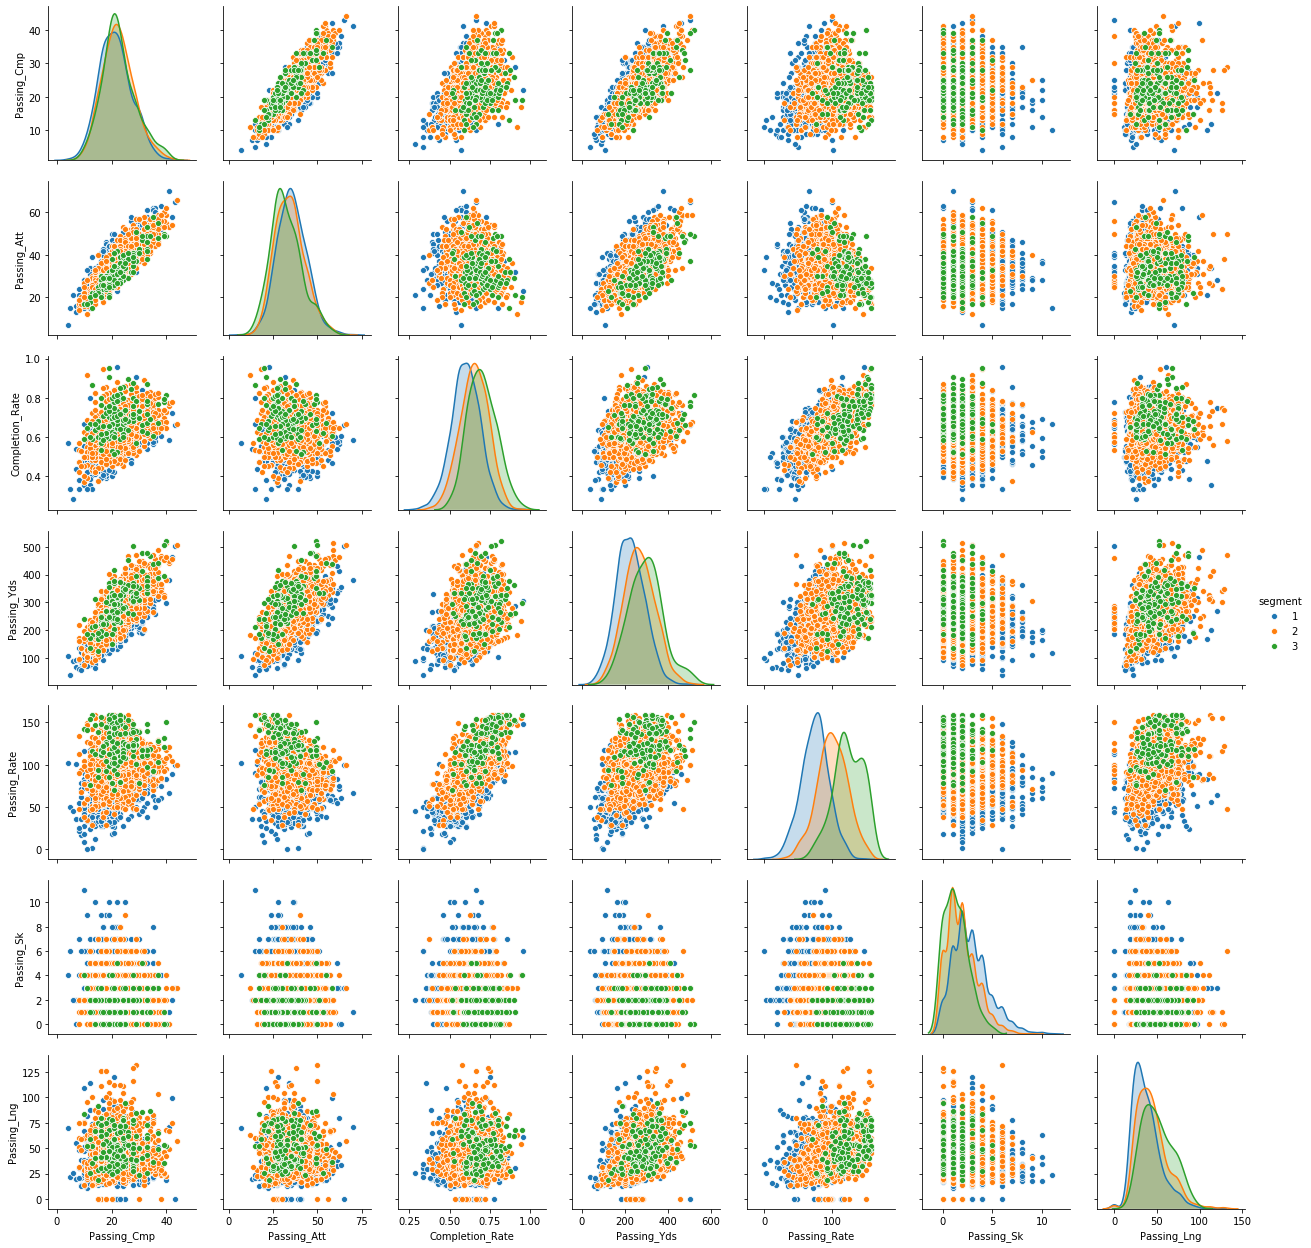

In [10]:
sns.pairplot(datas, 
             vars = ['Passing_Cmp', 'Passing_Att', 'Completion_Rate', 'Passing_Yds', 'Passing_Rate', 
                     'Passing_Sk', 'Passing_Lng'], hue = 'segment')

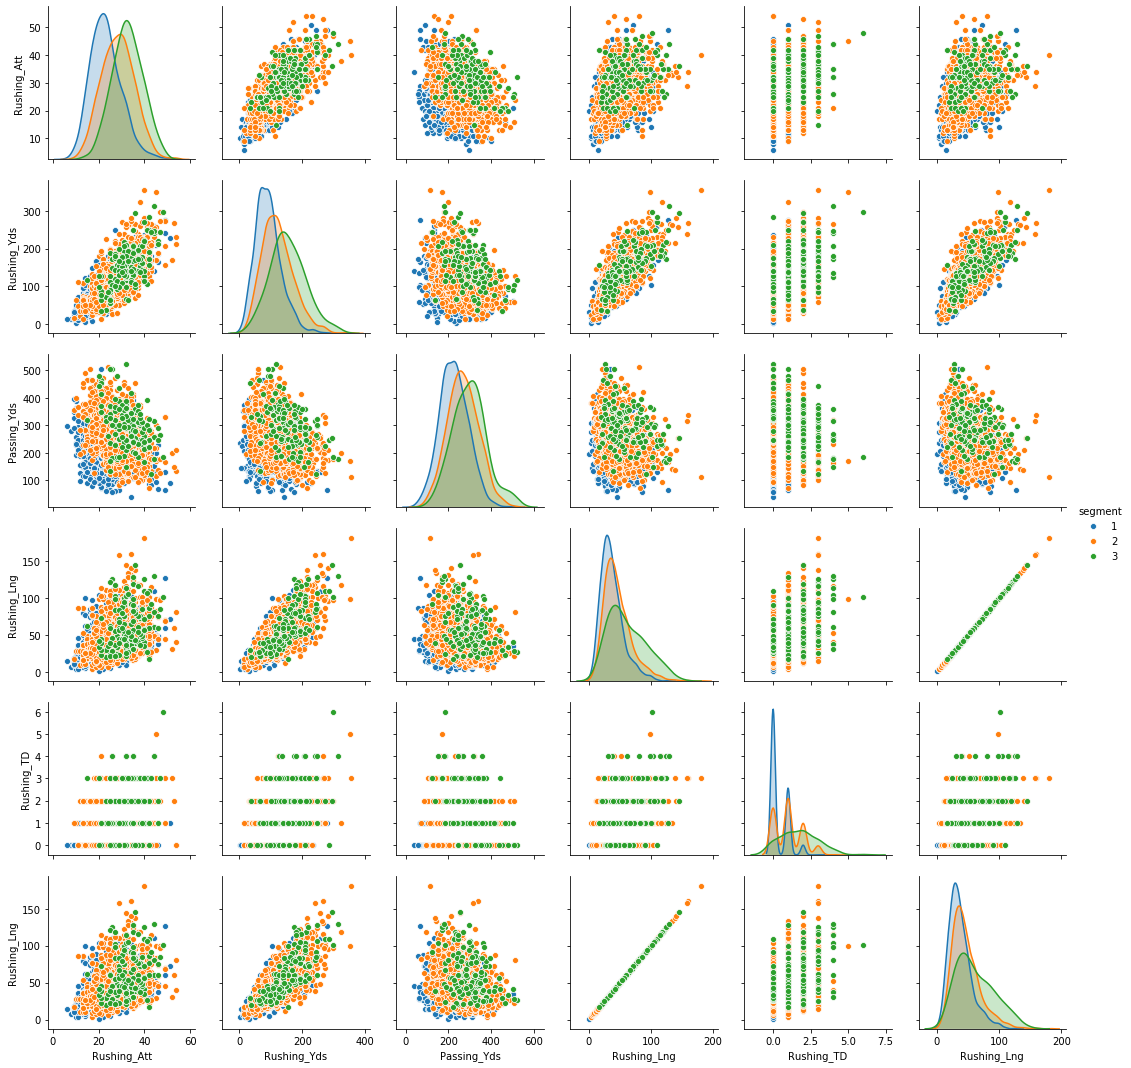

In [11]:
sns.pairplot(datas, 
             vars = ['Rushing_Att', 'Rushing_Yds', 'Passing_Yds', 'Rushing_Lng', 
                     'Rushing_TD', 'Rushing_Lng'], hue = 'segment')

### Analysis I: Linear Regression

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\tammy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


##### Assumption: Completion_Rate, Passing_Yds, Passing_Int, Passing_Sk, Rushing_Yds, Fumbles_FL, Turnovers and Total_Yards have significant influence on the final score

##### Attempt 1: Test the assumption

In [13]:
m_assume = ols("Final ~ Completion_Rate + Passing_Yds + Passing_Int + Passing_Sk + Rushing_Yds + Fumbles_FL + Turnovers + Total_Yards", data = scaled_data).fit()
print(m_assume.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     439.9
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:54:15   Log-Likelihood:                -2723.8
No. Observations:                2560   AIC:                             5462.
Df Residuals:                    2553   BIC:                             5503.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.014     

##### Check the linearity and independence

In [70]:
model1 = ols("Final ~ Completion_Rate + Passing_Yds + Passing_Int + Passing_Sk + Rushing_Yds + Fumbles_FL + Turnovers + Total_Yards", data = nfl_data).fit()

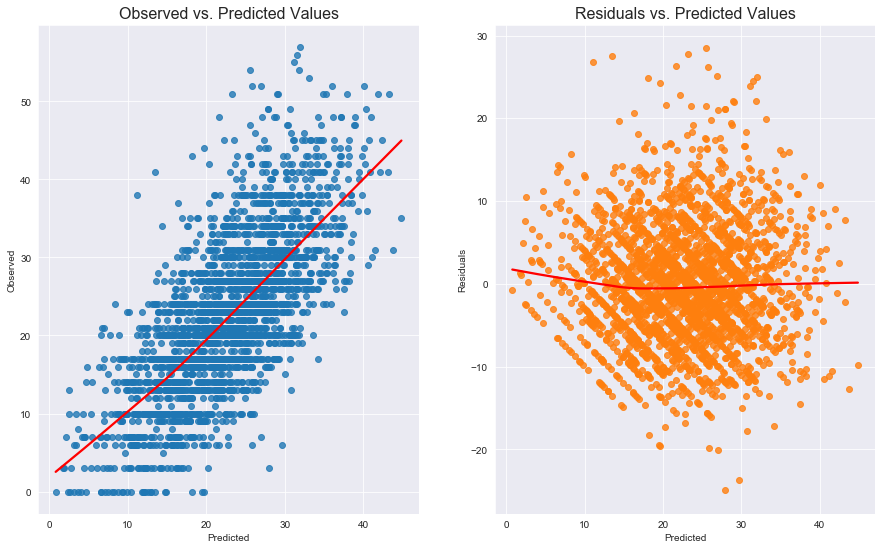

In [71]:
y = pd.Series(nfl_data['Final'])
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model1.predict()
    resids = model1.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model1, y)

##### Attempt 2: Testing all variables

In [20]:
m_all = ols("Final ~ Passing_Cmp + Passing_Att + Completion_Rate + Passing_Yds + Passing_Int + Passing_Sk + Passing_Yds_lostSack + Passing_Lng + Passing_Rate + Rushing_Att + Rushing_Yds + Rushing_Lng + Fumbles_FL + Turnovers + Total_Yards", data = scaled_data).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     332.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:00:27   Log-Likelihood:                -2362.8
No. Observations:                2560   AIC:                             4754.
Df Residuals:                    2546   BIC:                             4836.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.551e-17 

##### Check significance of independent variable

In [21]:
df_result_all = pd.DataFrame()
df_result_all['pvalues'] = m_all.pvalues[1:]
#df_result_all['Features'] = scaled_data.columns[:-1]
#df_result.set_index('Features', inplace = True)

def yes_no(b):
    if b <= 0.01:
        return 'Yes'
    else:
        return 'No'
    
df_result_all['Statistically significant?'] = df_result_all['pvalues'].apply(yes_no)

In [22]:
df_result_all

,pvalues,Statistically significant?
Passing_Cmp,2.629788e-01,No
Passing_Att,4.012440e-01,No
Completion_Rate,2.680141e-05,Yes
Passing_Yds,4.170682e-07,Yes
Passing_Int,1.203641e-24,Yes
Passing_Sk,2.050178e-03,Yes
Passing_Yds_lostSack,6.275963e-02,No
Passing_Lng,2.723204e-01,No
Passing_Rate,6.743465e-112,Yes
Rushing_Att,7.734726e-14,Yes


##### Attempt 3: Drop all insignificant variables and rerun the model

In [23]:
reg_data = scaled_data[['Completion_Rate', 'Passing_Yds', 'Passing_Int', 'Passing_Sk', 'Passing_Rate', 'Rushing_Att', 'Rushing_Yds', 'Rushing_Lng', 'Fumbles_FL', 'Turnovers', 'Total_Yards', 'Final']]
#reg_data

In [24]:
m_drop = ols("Final ~ Completion_Rate + Passing_Yds + Passing_Int + Passing_Sk + Passing_Rate + Rushing_Att + Rushing_Yds + Rushing_Lng + Fumbles_FL + Turnovers + Total_Yards", data = scaled_data).fit()
print(m_drop.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     478.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:00:50   Log-Likelihood:                -2366.9
No. Observations:                2560   AIC:                             4754.
Df Residuals:                    2550   BIC:                             4812.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.012   -4

##### Check for multicollinearity problem: VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [27]:
print("Check for VIF")
for i in range(len(reg_data.columns[:-1])):
    v = vif(np.matrix(reg_data[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(reg_data.columns[i], round(v,2)))

Check for VIF
Variance inflation factor for Completion_Rate: 2.13
Variance inflation factor for Passing_Yds: inf
Variance inflation factor for Passing_Int: inf
Variance inflation factor for Passing_Sk: 1.18
Variance inflation factor for Passing_Rate: 5.12
Variance inflation factor for Rushing_Att: 2.96
Variance inflation factor for Rushing_Yds: inf
Variance inflation factor for Rushing_Lng: 2.85
Variance inflation factor for Fumbles_FL: inf
Variance inflation factor for Turnovers: inf
Variance inflation factor for Total_Yards: inf


C:\Users\tammy\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


##### Check for multicollinearity problem: Correlation Heatmap

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data1 = nfl_data.drop(columns = ['id'])
X = data1.drop(['Final'], axis=1)
y = data1['Final']
np.random.seed(seed = 42)
#X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

Text(0.5, 1, 'Correlation matrix')

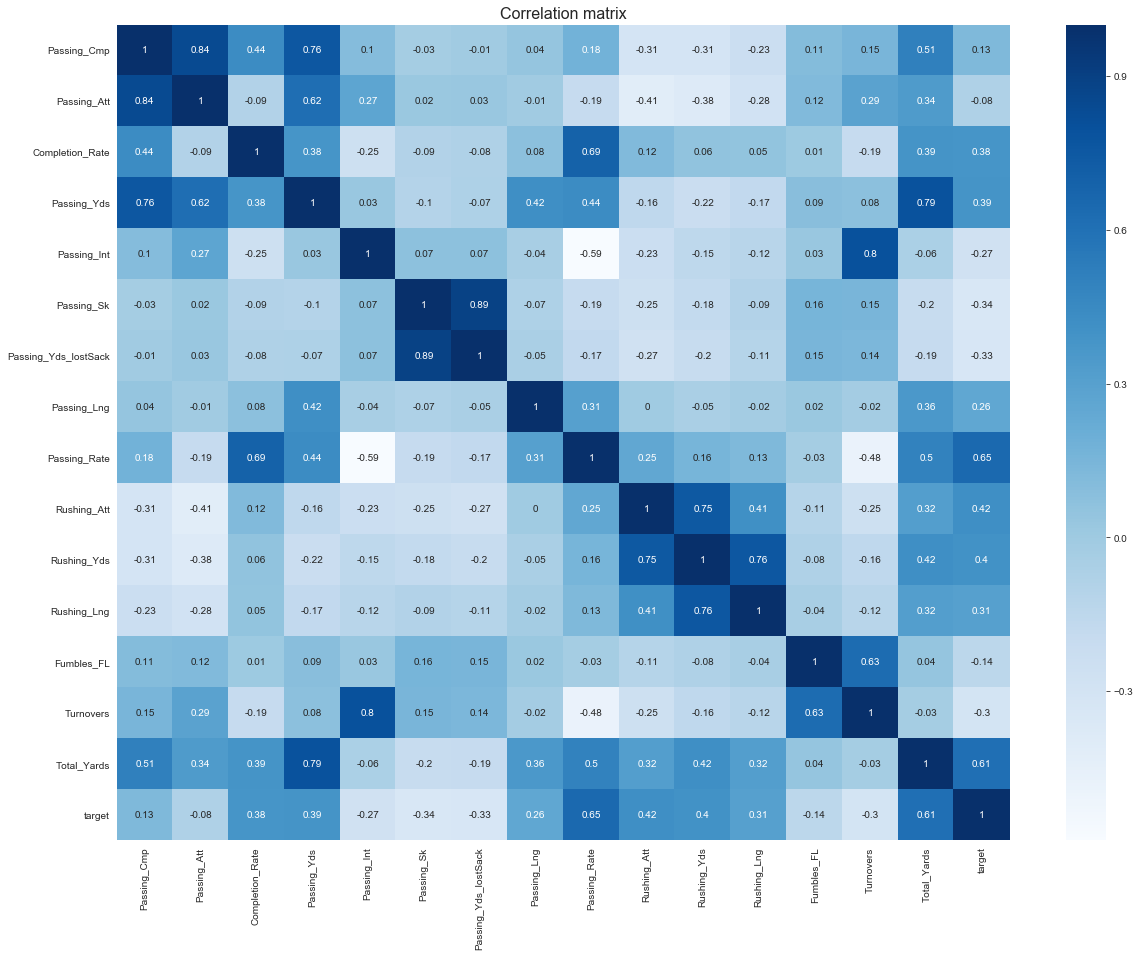

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 16)

##### Attempt 4: Finalize the regression model

In [33]:
reg_data_final = scaled_data[['Completion_Rate', 'Passing_Int', 'Passing_Sk', 'Passing_Rate', 'Rushing_Att', 'Rushing_Lng', 'Fumbles_FL', 'Total_Yards', 'Final']]
#reg_data_final

In [34]:
m_final = ols("Final ~ Completion_Rate + Passing_Int + Passing_Sk + Passing_Rate + Rushing_Att + Rushing_Lng + Fumbles_FL + Total_Yards", data = scaled_data).fit()
print(m_final.summary())
print("")
print("Check for VIF")
for i in range(len(reg_data_final.columns[:-1])):
    v = vif(np.matrix(reg_data_final[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(reg_data_final.columns[i], round(v,2)))

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     538.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:20:59   Log-Likelihood:                -2366.9
No. Observations:                2560   AIC:                             4752.
Df Residuals:                    2551   BIC:                             4804.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.012   -4

### Analysis II: Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

##### Standardize data

In [38]:
from sklearn.preprocessing import StandardScaler

In [46]:
data2 = nfl_data.drop(columns = ['id', 'Team'])
data2

,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_Int,Passing_Sk,Passing_Yds_lostSack,Passing_Lng,Passing_Rate,Rushing_Att,Rushing_Yds,Rushing_Lng,Fumbles_FL,Turnovers,Total_Yards,Final
0,23,33,0.696970,189,1,3,14,23,81.5,21,80,36,0,1,269,16
1,19,28,0.678571,191,0,1,0,33,110.9,37,207,57,0,0,398,36
2,16,22,0.727273,173,1,1,6,32,91.7,33,193,106,0,1,366,23
3,34,49,0.693878,349,2,2,8,44,86.2,18,86,18,1,3,435,20
4,17,25,0.680000,170,0,0,0,22,113.7,32,185,90,0,0,355,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,20,33,0.606061,132,0,4,31,18,79.4,15,63,36,0,0,195,10
2556,24,33,0.727273,185,2,3,20,13,60.8,29,127,24,2,4,312,3
2557,16,27,0.592593,310,1,0,0,111,109.9,27,99,39,0,1,409,35
2558,24,35,0.685714,285,1,1,7,43,109.8,36,158,42,1,2,443,33


In [47]:
names = data2.columns
sc = StandardScaler()
s_data = sc.fit_transform(data2)
s_data = pd.DataFrame(s_data, columns=names)

##### Take 80% as training data, 20% as testing data

In [48]:
sX = s_data.drop(['Final'], axis=1)
sy = s_data['Final']

sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.2, random_state=42)

##### Random Forest Regressor

In [49]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(sX_train, sy_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(sX_train, sy_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(sX_train, sy_train)))

R^2 Training Score: 0.94 
OOB Score: 0.57 
R^2 Validation Score: 0.94


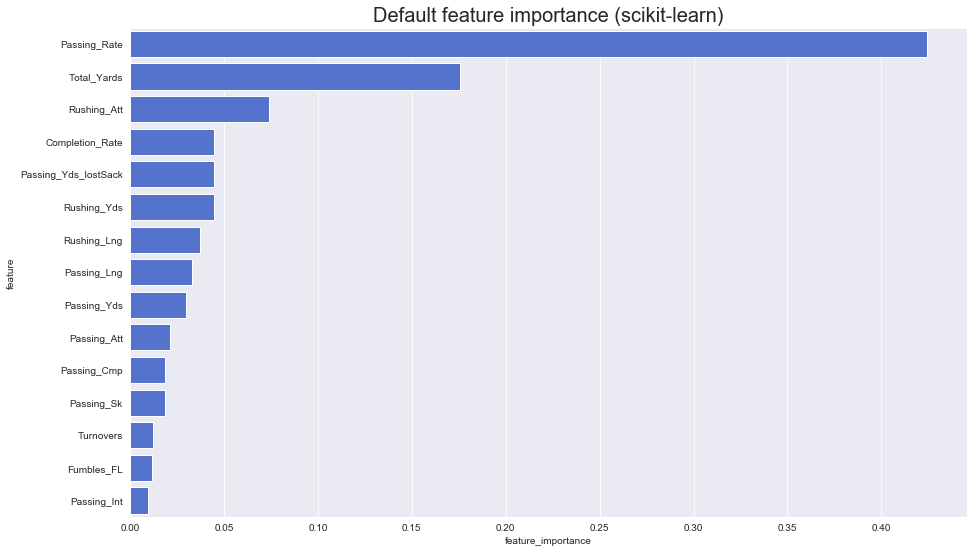

In [50]:
base_imp = imp_df(sX_train.columns, rf.feature_importances_)
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

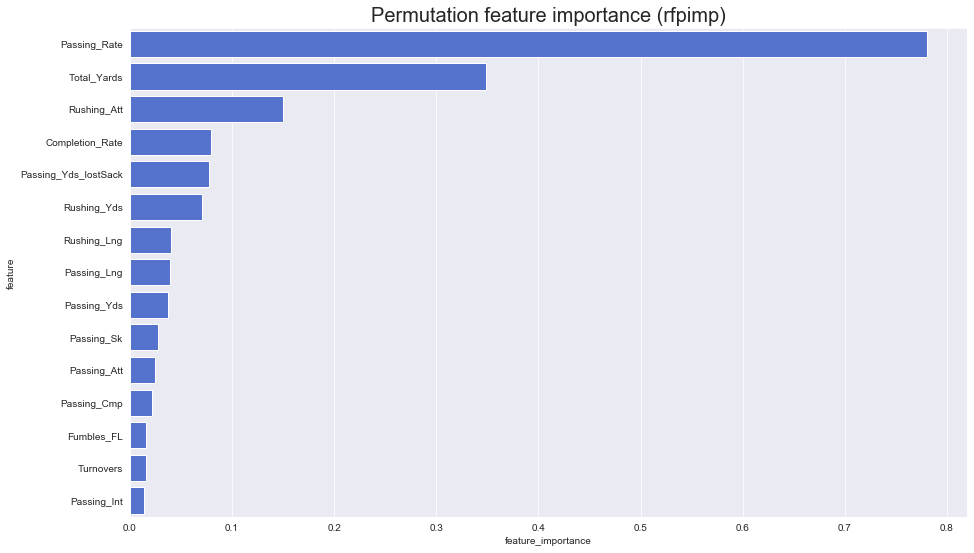

In [53]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, sX_train, sy_train):
    return r2_score(sy_train, rf.predict(sX_train))

perm_imp_rfpimp = permutation_importances(rf, sX_train, sy_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

Weight,Feature
0.7848 ± 0.0321,x8
0.3282 ± 0.0172,x14
0.1585 ± 0.0113,x9
0.0777 ± 0.0053,x6
0.0753 ± 0.0051,x2
0.0723 ± 0.0047,x10
0.0424 ± 0.0022,x11
0.0399 ± 0.0017,x7
0.0362 ± 0.0016,x3
0.0284 ± 0.0034,x5


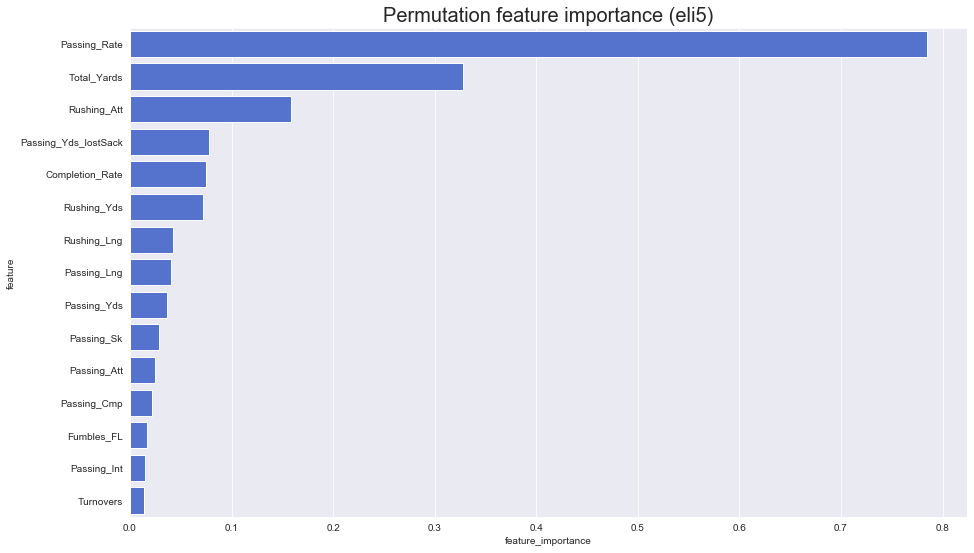

In [54]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(sX_train, sy_train)
perm_imp_eli5 = imp_df(sX_train.columns, perm.feature_importances_)

var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')
eli5.show_weights(perm)

### Team Evaluation

##### Import testing data (NFL 2019 data)

In [55]:
df_2019 = pd.read_csv('../Downloads/nfl_2019_clean.csv')

In [56]:
df_2019.head()

,ID,Team,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_TD,Passing_Int,Passing_Sk,Passing_Yds_lost,...,Receiving_Lng,Fumbles_Fmb,Fumbles_FL,Total_Yards,Q1,Q2,Q3,Q4,OT,Final
0,GNB/boxscores/201909050chi.htm,GNB,18,30,0.600000,203,1,0,5,37,...,149,1,0,250,0,7,0,3,NaN,10
1,CHI/boxscores/201909050chi.htm,CHI,26,45,0.577778,228,0,1,5,20,...,94,0,0,274,3,0,0,0,NaN,3
2,TEN/boxscores/201909080cle.htm,TEN,14,24,0.583333,248,3,0,4,32,...,161,0,0,371,3,9,10,21,NaN,43
3,CLE/boxscores/201909080cle.htm,CLE,25,38,0.657895,285,1,3,5,41,...,154,0,0,387,6,0,7,0,NaN,13
4,LAR/boxscores/201909080car.htm,LAR,23,39,0.589744,186,1,1,1,3,...,73,1,0,352,0,13,10,7,NaN,30


##### Poisson Regression

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
df_train = nfl_data
df_test = df_2019
print('Training data set length=' + str(len(df_train)))
print('Testing data set length=' + str(len(df_test)))

Training data set length=2560
Testing data set length=384


In [61]:
import patsy

In [62]:
expr = """Final ~ Completion_Rate + Passing_Int + Passing_Sk + Passing_Rate + Rushing_Att + Rushing_Lng + Fumbles_FL + Total_Yards"""

y_train, X_train = patsy.dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = patsy.dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Final']

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Final   No. Observations:                 2560
Model:                            GLM   Df Residuals:                     2551
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8805.1
Date:                Thu, 12 Dec 2019   Deviance:                       5300.0
Time:                        19:33:22   Pearson chi2:                 4.93e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7773      0.037     

##### Actual score versus Expected score

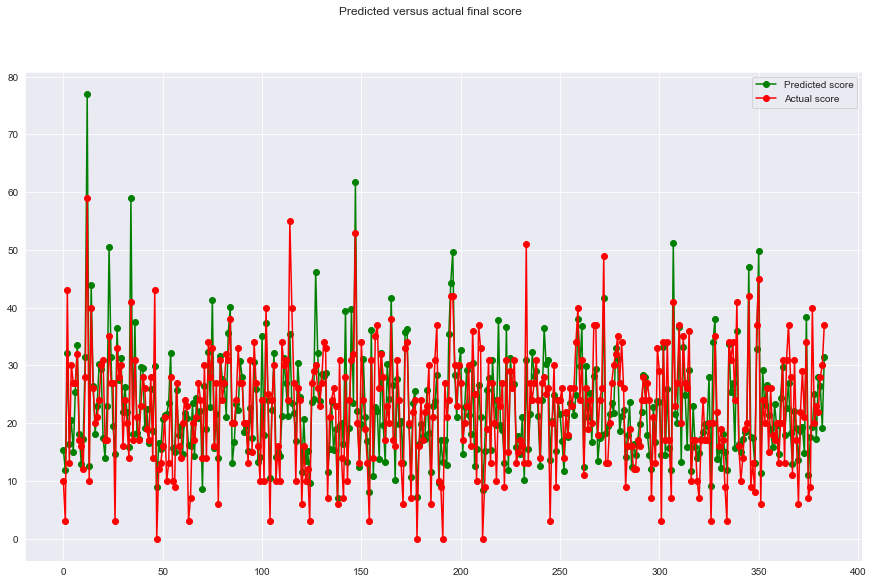

In [63]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual final score')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted score')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual score')
plt.legend(handles=[predicted, actual])
plt.rcParams["figure.figsize"] = (15,10)

<Figure size 1080x720 with 0 Axes>

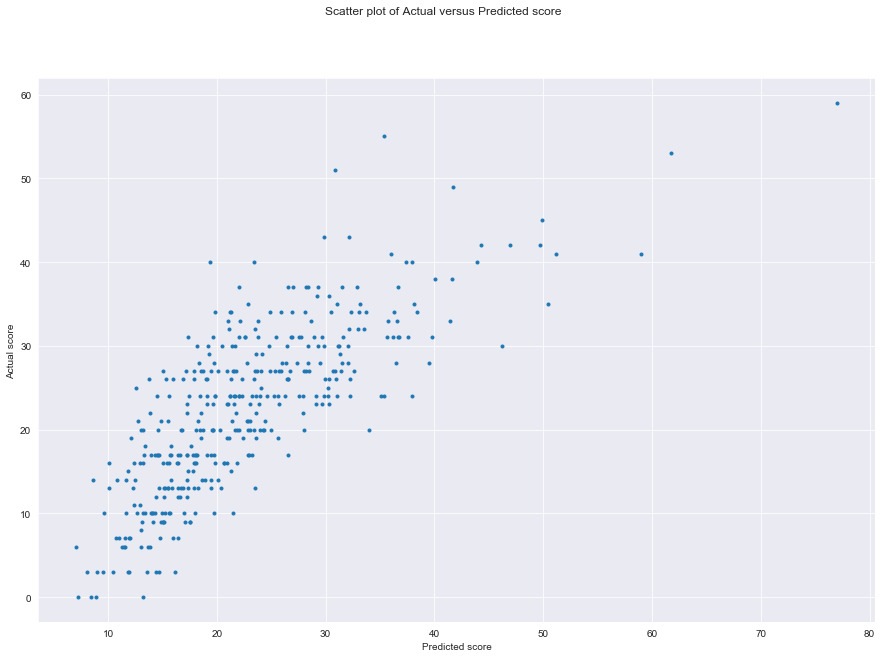

In [64]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted score')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted score')
plt.ylabel('Actual score')
plt.show()

##### Team performance evaluation

In [65]:
df_2019['Expected_Score'] = predicted_counts.round(0)

In [66]:
df_2019['Performance'] = np.where(df_2019['Final'] >= df_2019['Expected_Score'], 1, 0)

In [67]:
df_2019['Difference'] = df_2019['Final'] - df_2019['Expected_Score']

In [68]:
df_2019

,ID,Team,Passing_Cmp,Passing_Att,Completion_Rate,Passing_Yds,Passing_TD,Passing_Int,Passing_Sk,Passing_Yds_lost,...,Total_Yards,Q1,Q2,Q3,Q4,OT,Final,Expected_Score,Performance,Difference
0,GNB/boxscores/201909050chi.htm,GNB,18,30,0.600000,203,1,0,5,37,...,250,0,7,0,3,NaN,10,15.0,0,-5.0
1,CHI/boxscores/201909050chi.htm,CHI,26,45,0.577778,228,0,1,5,20,...,274,3,0,0,0,NaN,3,12.0,0,-9.0
2,TEN/boxscores/201909080cle.htm,TEN,14,24,0.583333,248,3,0,4,32,...,371,3,9,10,21,NaN,43,32.0,1,11.0
3,CLE/boxscores/201909080cle.htm,CLE,25,38,0.657895,285,1,3,5,41,...,387,6,0,7,0,NaN,13,16.0,0,-3.0
4,LAR/boxscores/201909080car.htm,LAR,23,39,0.589744,186,1,1,1,3,...,352,0,13,10,7,NaN,30,20.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,DEN/boxscores/201912010den.htm,DEN,18,28,0.642857,134,2,1,0,0,...,218,14,3,0,6,NaN,23,17.0,1,6.0
380,NWE/boxscores/201912010htx.htm,NWE,24,47,0.510638,326,3,1,3,23,...,471,3,0,6,13,NaN,22,28.0,0,-6.0
381,HOU/boxscores/201912010htx.htm,HOU,19,26,0.730769,240,4,0,3,16,...,292,7,7,7,7,NaN,28,26.0,1,2.0
382,MIN/boxscores/201912020sea.htm,MIN,22,38,0.578947,276,2,1,0,0,...,354,7,10,0,13,NaN,30,19.0,1,11.0


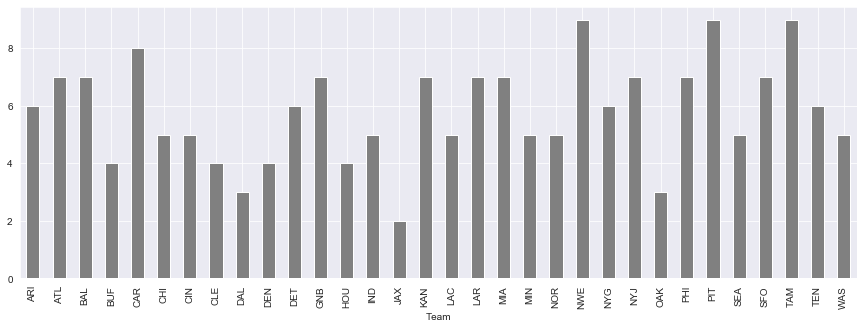

In [69]:
df_2019.groupby('Team')['Performance'].sum().plot(kind = 'bar', color = 'gray', figsize = (15,5))